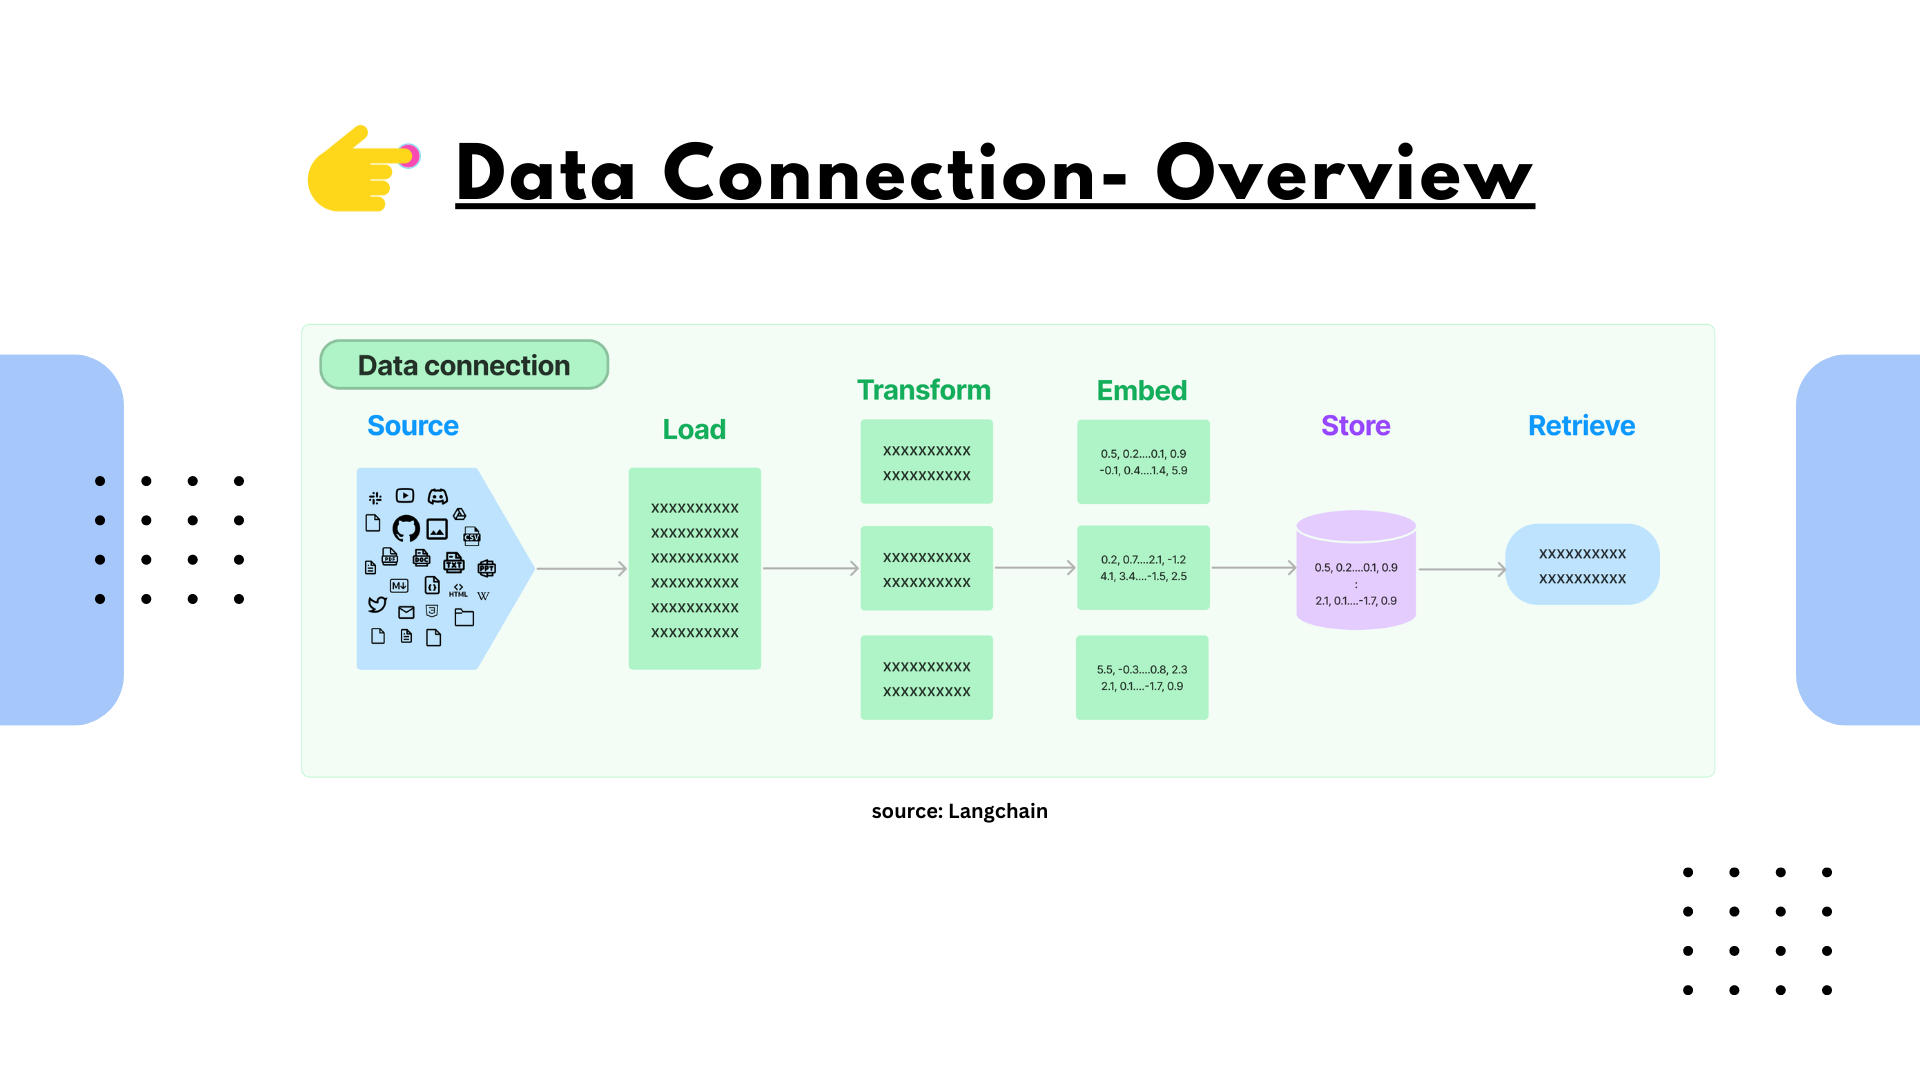

In [1]:
import pprint as pp
from pathlib import Path
from dotenv import find_dotenv, load_dotenv

load_dotenv(Path('../../.env'))

from langchain.document_loaders import TextLoader
from langchain.text_splitter import CharacterTextSplitter
from langchain.embeddings import OpenAIEmbeddings
from langchain.vectorstores import Chroma
from langchain.chains import RetrievalQA
from langchain.embeddings.sentence_transformer import SentenceTransformerEmbeddings

## Document loaders
#### Load documents from many different sources

In [2]:
loader = TextLoader('Sample.txt')
documents = loader.load()

In [5]:
documents[:10]

[Document(page_content="India, officially known as the Republic of India, is a diverse and vibrant country located in South Asia. With a rich history spanning thousands of years, India is known for its cultural heritage, religious diversity, and vast landscapes. From the majestic Himalayas in the north to the serene backwaters of Kerala in the south, India encompasses a wide range of geographical features, including deserts, plains, mountains, and coastlines, making it a land of incredible natural beauty.\n\nIndia is the seventh-largest country by land area and the second-most populous country in the world, with a population exceeding 1.3 billion people. It is a federal parliamentary democratic republic, with a president as the head of state and a prime minister as the head of government. The country follows a multi-tiered administrative structure, with 28 states and 9 union territories, each having its own elected government.\n\nIndia has a rich cultural heritage that has evolved over

## Document transformers

We wont be able to send all of this to the LLM, so Split document and drop redundant documents

In [12]:
text_splitter = CharacterTextSplitter(chunk_size=400,
chunk_overlap=10)

texts = text_splitter.split_documents(documents)

Created a chunk of size 486, which is longer than the specified 400
Created a chunk of size 426, which is longer than the specified 400
Created a chunk of size 419, which is longer than the specified 400
Created a chunk of size 498, which is longer than the specified 400
Created a chunk of size 436, which is longer than the specified 400


In [13]:
len(texts)

17

In [18]:
# Been split up into many document objects.
texts

[Document(page_content='India, officially known as the Republic of India, is a diverse and vibrant country located in South Asia. With a rich history spanning thousands of years, India is known for its cultural heritage, religious diversity, and vast landscapes. From the majestic Himalayas in the north to the serene backwaters of Kerala in the south, India encompasses a wide range of geographical features, including deserts, plains, mountains, and coastlines, making it a land of incredible natural beauty.', metadata={'source': 'Sample.txt'}),
 Document(page_content='India is the seventh-largest country by land area and the second-most populous country in the world, with a population exceeding 1.3 billion people. It is a federal parliamentary democratic republic, with a president as the head of state and a prime minister as the head of government. The country follows a multi-tiered administrative structure, with 28 states and 9 union territories, each having its own elected government.'

## Text embedding models
#### Take unstructured text and turn it into a list of floating point numbers

A sentence-transformers model is designed to transform sentences and paragraphs into a high-dimensional vector space of 384 dimensions. <br>]
This model is particularly useful for tasks such as clustering or semantic search, where the vector representations can be employed to measure similarity and perform efficient retrieval operations.

In [19]:
embeddings = SentenceTransformerEmbeddings(model_name="all-MiniLM-L6-v2")

## Vector stores


We need to store and search over embedded data

An AI-native open-source embedding database, designed to make it easy to build LLM apps by making knowledge, facts, and skills pluggable for LLMs. It is free to use under an Apache 2.0 license.

In [21]:
# Store the embeddings and the text in a db
db = Chroma.from_documents(texts, embeddings)

In [22]:
db._collection.get(include=['embeddings'])

{'ids': ['a8e6358a-4e86-11ee-867a-ea4be56e3531',
  'a8e63684-4e86-11ee-867a-ea4be56e3531',
  'a8e636a2-4e86-11ee-867a-ea4be56e3531',
  'a8e636c0-4e86-11ee-867a-ea4be56e3531',
  'a8e636d4-4e86-11ee-867a-ea4be56e3531',
  'a8e636f2-4e86-11ee-867a-ea4be56e3531',
  'a8e63706-4e86-11ee-867a-ea4be56e3531',
  'a8e6371a-4e86-11ee-867a-ea4be56e3531',
  'a8e63738-4e86-11ee-867a-ea4be56e3531',
  'a8e6374c-4e86-11ee-867a-ea4be56e3531',
  'a8e6376a-4e86-11ee-867a-ea4be56e3531',
  'a8e6377e-4e86-11ee-867a-ea4be56e3531',
  'a8e63792-4e86-11ee-867a-ea4be56e3531',
  'a8e637b0-4e86-11ee-867a-ea4be56e3531',
  'a8e637c4-4e86-11ee-867a-ea4be56e3531',
  'a8e637d8-4e86-11ee-867a-ea4be56e3531',
  'a8e637ec-4e86-11ee-867a-ea4be56e3531',
  'b85cfe90-4e86-11ee-867a-ea4be56e3531',
  'b85cff08-4e86-11ee-867a-ea4be56e3531',
  'b85cff26-4e86-11ee-867a-ea4be56e3531',
  'b85cff44-4e86-11ee-867a-ea4be56e3531',
  'b85cff62-4e86-11ee-867a-ea4be56e3531',
  'b85cff80-4e86-11ee-867a-ea4be56e3531',
  'b85cff9e-4e86-11ee-867a-

## Retrievers
#### Query your data

A vector store retriever is a retrieval system that utilizes a vector store to fetch documents. <br>It acts as a simplified interface to the Vector Store class, adapting it to adhere to the Retriever interface. <br>

By leveraging the search functionalities provided by the vector store, such as similarity search and Maximal Marginal Relevance (MMR), <br>the vector store retriever conducts queries on the text data contained within the vector store.


You can also specify 'search kwargs' value `k` as 1,2,3 ..... to use when doing retrieval.

In [36]:
retriever = db.as_retriever(search_kwargs={"k": 4})

In [37]:
? retriever

Type:           VectorStoreRetriever
String form:    tags=['Chroma', 'HuggingFaceEmbeddings'] metadata=None vectorstore=<langchain.vectorstores.chroma.Chroma object at 0x2b64c54f0> search_type='similarity' search_kwargs={'k': 4}
File:           ~/anaconda3/envs/masterclass/lib/python3.9/site-packages/langchain/vectorstores/base.py
Docstring:      Base Retriever class for VectorStore.
Init docstring:
Create a new model by parsing and validating input data from keyword arguments.

Raises ValidationError if the input data cannot be parsed to form a valid model.

## Question 1

<font color='green'>
'get_relevant_documents' function gives out the relevant documnets list, based on your choice you can proceed further
<font>

In [38]:
docs = retriever.get_relevant_documents("What is the capital of india?")
docs

[Document(page_content='Delhi is the capital of India\n\nHowever, India also faces various socio-economic challenges. Poverty, income inequality, and unemployment are persistent issues that the country strives to address. Efforts are being made to improve education, healthcare, infrastructure, and social welfare programs to uplift marginalized sections of society.', metadata={'source': 'Sample.txt'}),
 Document(page_content='Delhi is the capital of India\n\nHowever, India also faces various socio-economic challenges. Poverty, income inequality, and unemployment are persistent issues that the country strives to address. Efforts are being made to improve education, healthcare, infrastructure, and social welfare programs to uplift marginalized sections of society.', metadata={'source': 'Sample.txt'}),
 Document(page_content='India, officially known as the Republic of India, is a diverse and vibrant country located in South Asia. With a rich history spanning thousands of years, India is kn

In [39]:
docs = retriever.get_relevant_documents("What is the currency india?")
docs

[Document(page_content='The Indian rupee is the official currency in the Republic of India. The rupee is subdivided into 100 paise. The issuance of the currency is controlled by the Reserve Bank of India.\n\nThe Indian rupee sign (₹) is the currency symbol for the Indian rupee the official currency of India', metadata={'source': 'Sample.txt'}),
 Document(page_content='The Indian rupee is the official currency in the Republic of India. The rupee is subdivided into 100 paise. The issuance of the currency is controlled by the Reserve Bank of India.\n\nThe Indian rupee sign (₹) is the currency symbol for the Indian rupee the official currency of India', metadata={'source': 'Sample.txt'}),
 Document(page_content="India's economy is one of the fastest-growing in the world. It has transitioned from an agrarian economy to a service-oriented and industrialized economy. The country is known for its software and information technology services, pharmaceuticals, textiles, agriculture, and manufact